In [1]:
import numpy as np
from funkcija_6_1 import generate_data
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
np.random.seed(242)
train_data = generate_data(200)

In [3]:
np.random.seed(12)
test_data = generate_data(100)

In [4]:
X_train = train_data[:, [0, 1]]
y_train = train_data[:, 2]
X_test = test_data[:, [0, 1]]
y_test = test_data[:, 2]

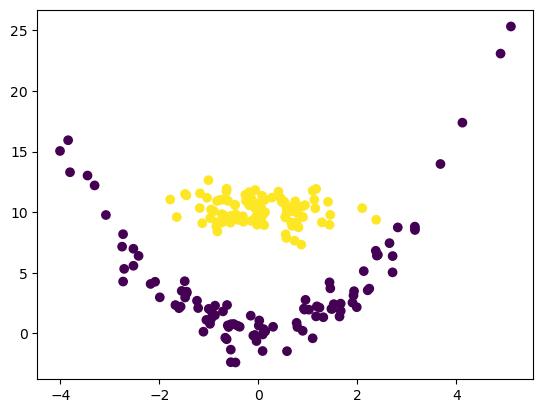

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [6]:
model = LogisticRegression().fit(X_train, y_train)

In [7]:
theta0 = model.intercept_
theta12 = model.coef_
theta1 = theta12[:, 0]
theta2 = theta12[:, 1]

In [8]:
y = []
for x in X_train[:, 0]:
    y.append(-(theta0 + theta1*x) / theta2)

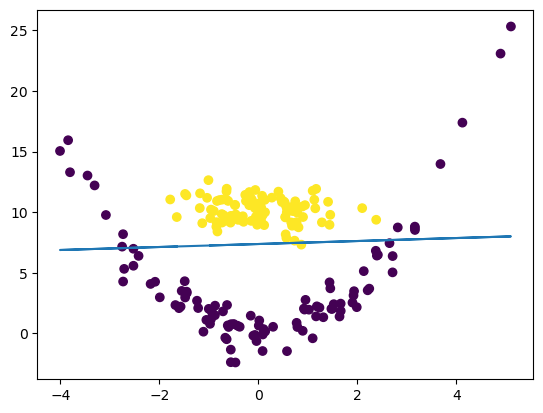

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.plot(X_train[:, 0], y)


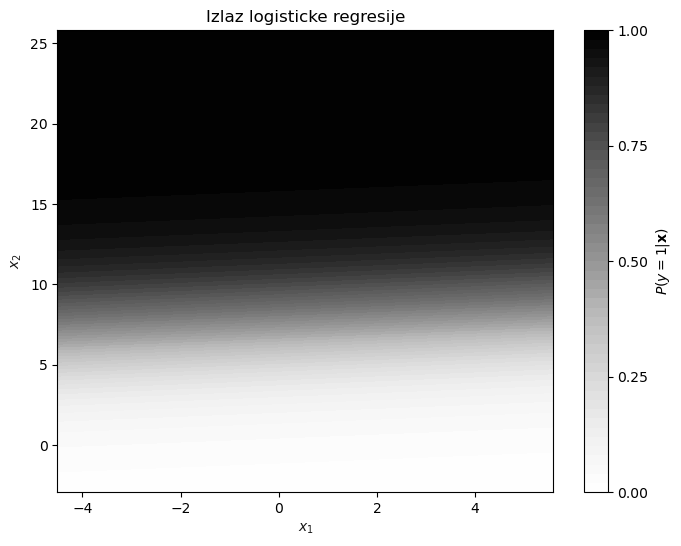

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(X_train[:,0])-0.5:max(X_train[:,0])+0.5:.05,
                          min(X_train[:,1])-0.5:max(X_train[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()


In [11]:
y_predict = model.predict(X_test)

In [12]:
y_test_correct = []
for i in range(len(y_test)):
    if (y_predict[i] == y_test[i]):
        y_test_correct.append(1)
    else:        
        y_test_correct.append(0)

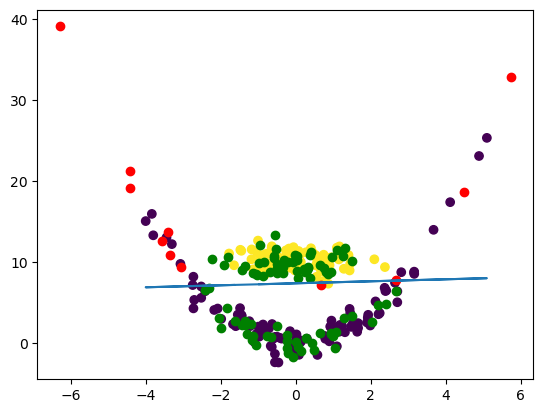

In [13]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.plot(X_train[:, 0], y)

for i in range(len(y_test)):
    plt.scatter(X_test[i][0], X_test[i][1], c=['r', 'g'][y_test_correct[i]])

plt.show()

In [18]:
from funkcija_6_3 import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [15]:
c_matrix = confusion_matrix(y_test, y_predict)

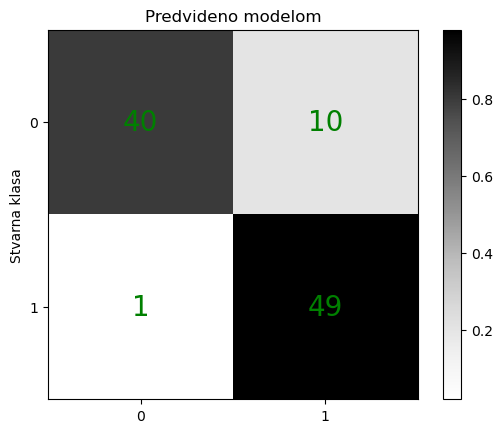

In [16]:
plot_confusion_matrix(c_matrix)

In [22]:
accuracy = metrics.accuracy_score(y_test, y_predict)
missclasification_rate = 1 - accuracy
precision = metrics.precision_score(y_test, y_predict)
recall = metrics.recall_score(y_test, y_predict)

tn, fp, fn, tp = c_matrix.ravel()
specificity = tn / (tn+fp)

In [24]:
print("accuracy: " + str(accuracy))
print("missclasification rate: " + str(missclasification_rate))
print("precision: " + str(precision))
print("recall: " + str(recall))
print("specificity: " + str(specificity))

accuracy: 0.89
missclasification rate: 0.10999999999999999
precision: 0.8305084745762712
recall: 0.98
specificity: 0.8
